In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets

(Train_in,Train_out),(Test_in,Test_out) = datasets.mnist.load_data()

Train_in = Train_in.reshape(60000,28,28,1)
Test_in = Test_in.reshape(10000,28,28,1)

Train_out = to_categorical(Train_out)
Test_out = to_categorical(Test_out)

In [ ]:
# Create the model
model = Sequential()

model.add(Flatten(name='Input'))
model.add(Dense(512,activation='softmax',name='H1'))
model.add(Dense(512,activation='softmax',name='H2'))
model.add(Dense(512,activation='softmax',name='H3'))
model.add(Dense(10,activation='softmax',name='Output'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

TrainingLog = model.fit(Train_in,Train_out,epochs=10,validation_split=0.1)

Epoch 1/10


2025-02-17 07:29:33.601035: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


 222/1688 [==>...........................] - ETA: 4:47 - loss: 2.3025 - accuracy: 0.1102

KeyboardInterrupt: 

In [4]:
plt.plot(TrainingLog.history['accuracy'],label='Accuracy')
plt.plot(TrainingLog.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Rate of change of Accuracy')
plt.grid()

NameError: name 'TrainingLog' is not defined

In [22]:
model.evaluate(Test_in,Test_out)

313/313 [==============================] - 21s 68ms/step - loss: 2.0232 - accuracy: 0.3028


[2.0231566429138184, 0.3027999997138977]

1/1 [==============================] - 0s 130ms/step
3


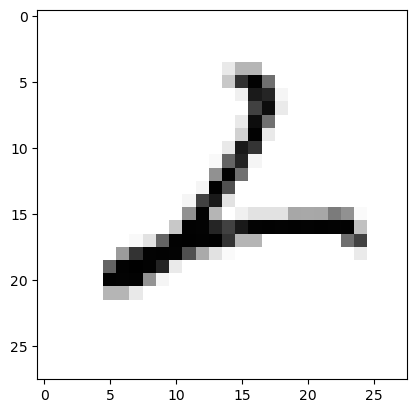

In [43]:
test_index=43
plt.imshow(Test_in[test_index].reshape(28,28),cmap='Greys')
print(model.predict(Test_in[test_index].reshape(1,28,28,1)).argmax())